## Visualizing the dataset

In [1]:
import sys
sys.path.append("/home/jeans/internship/parking-customer-count")

from countpassenger.Config import conf
from countpassenger import Preprocess

import pandas as pd
import os.path as osp
import os

In [2]:

df_vehicle = pd.read_csv(
    osp.join(conf.RESOURCES_RAW_DIR, "2024-04-28/mbk-tourist-vehicle-object-20240428.csv")
)
print(list(df_vehicle.sort_values(by=['camera','timestamp_precise']).to_string()))

      is_plate_valid  travel_distance  vehicle_type_confidence     lifetime  ymin                                                                                                                                  vehicle_type_model                       _id plate_number  xmin  province_confidence similarized_plate_number  plate_number_confidence                                                                  plate_representative_vehicle_image_name                                                           id                                                                                                                                                     car_brand_model  xmax                                                                                               image_name purchasing_power province                      camera  travel_displacement            timestamp count_id             car_brand  travel_trajectory  frame_no                        original_video_name  ymax  plate_c


    Only care about
- van
- bus
- have license plate

No use collumn are
- car_brand_model  
- vehicle_type_model           
- plate_number_definition  

In [3]:
df_vehicle = Preprocess.df_clean_vehicle(df_vehicle=df_vehicle,drop_na=[],convert_truck=False)
print(df_vehicle.to_string())

      is_plate_valid  travel_distance  vehicle_type_confidence     lifetime  ymin plate_number  xmin  province_confidence similarized_plate_number  plate_number_confidence  xmax                                                                                               image_name purchasing_power province                      camera  travel_displacement            timestamp             car_brand  travel_trajectory  frame_no                        original_video_name  ymax  plate_color_confidence vehicle_type  car_brand_confidence plate_color  plate_image_name       timestamp_precise           true_video_name                                 video_name camera_cleaned  timestamp_unix  timestamp_unix_end
0              False         1.171061                      NaN     1.838000     0          NaN  1334                  NaN                      NaN                      NaN  2139                                                                                                      NaN      

In [4]:

# sorted_vehicle = 
# print(sorted_vehicle.corr(numeric_only=True))
df_vehicle = df_vehicle[df_vehicle['camera'] == 'mbk-14-13-vehicle-snapshot']
print(df_vehicle.sort_values(by=conf.VEHICLE_INTEREST_SNAPSHOT)[conf.VEHICLE_INTEREST_SNAPSHOT].to_string())


                          camera       timestamp_precise  xmin  xmax  ymax  lifetime plate_number vehicle_type
2309  mbk-14-13-vehicle-snapshot 2024-04-28 02:25:01.000   712  1672   337     1.358          NaN          NaN
2310  mbk-14-13-vehicle-snapshot 2024-04-28 02:26:52.614   143  2082  1133    37.510          NaN          NaN
2250  mbk-14-13-vehicle-snapshot 2024-04-28 03:03:07.593   208  1300   597   149.958          NaN         taxi
2190  mbk-14-13-vehicle-snapshot 2024-04-28 03:38:07.633  1546  2038   222    37.469       801738       pickup
2173  mbk-14-13-vehicle-snapshot 2024-04-28 03:56:15.105   136  1813  1433    37.470          NaN       pickup
2174  mbk-14-13-vehicle-snapshot 2024-04-28 03:58:45.065  1553  2183   327    37.471       ฮง6191        other
2175  mbk-14-13-vehicle-snapshot 2024-04-28 03:59:58.683  1143  1888   747    36.110       สก2765       tuktuk
2158  mbk-14-13-vehicle-snapshot 2024-04-28 04:04:59.163   614  1721  1086   298.163          NaN       tuktuk
2

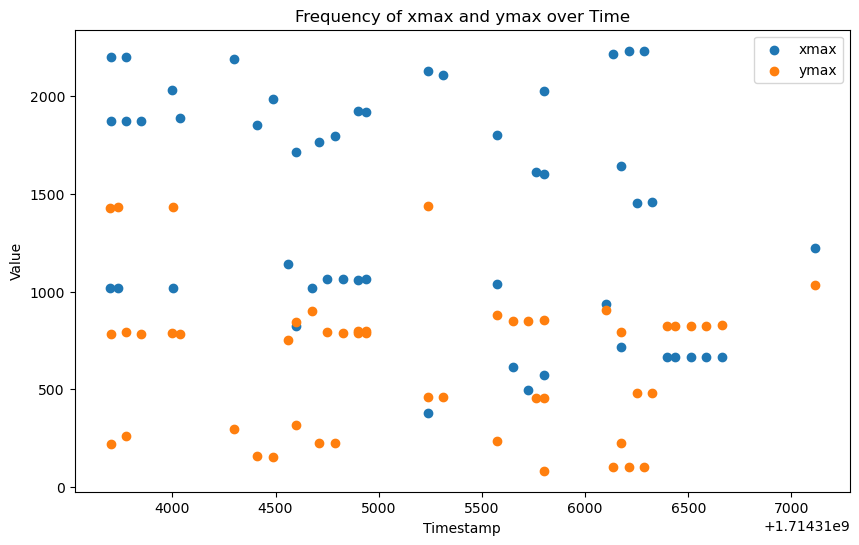

In [5]:
import matplotlib.pyplot as plt
df_vehicle = df_vehicle[0:50]
plt.figure(figsize=(10, 6))

plt.scatter(df_vehicle['timestamp_unix'], df_vehicle['xmax'], label='xmax')
plt.scatter(df_vehicle['timestamp_unix'], df_vehicle['ymax'], label='ymax')

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Frequency of xmax and ymax over Time')
plt.legend()

plt.show()